# Project: Compute the Profit and Breakeven Points for a Jade Lizard at Expiration

In this project you will compute the profit at expiration for a [Jade Lizard](https://www.tastylive.com/concepts-strategies/jade-lizard) constructed on [Advanced Micro Devices (AMD)](https://en.wikipedia.org/wiki/AMD). The [Jade Lizard strategy](https://www.tastylive.com/concepts-strategies/jade-lizard) is a `neutral to bullish` strategy that is constructed using a combination of $3~\times$ option contracts: a `short put`, a `short call`, and a `long call`. It involves selling an out-of-the-money (OTM) `put` and an OTM `call`, while simultaneously buying a further OTM `call`.

### Background
Call and put contracts can be combined to develop composite contract structures with interesting payoff diagrams. Let's limit our focus to contracts that have the same underlying asset and the same expiration date. A composite option contract be composed of $d$ legs (individual contracts) in the contract set $\mathcal{C}$ where each leg $i\in\mathcal{C}$ is written with respect to the same underlying stock `XYZ` and has the same expiration date. Then, the overall payoff of the composite contract $\hat{V}(S(T),K_{1},\dots,K_{d})$ is given by:


$$\hat{V}(S(T),K_{1},\dots,K_{d}) = \sum_{i\in\mathcal{C}}\theta_{i}n_{i}V_{i}(S(T),K_{i})$$


where $K_{i}$ denotes the strike price of contract $i\in\mathcal{C}$. The overall profit of the composite contract $\hat{P}$ is given by:


$$\hat{P}(S(T),K_{1},\dots,K_{d}) = \sum_{i\in\mathcal{C}}\theta_{i}n_{i}P_{i}(S(T),K_{i})$$


where $\theta_{i}$ denotes the direction of contract $i$: if contract $i$ is short (sold), then $\theta_{i}=-1$, otherwise $\theta_{i}=1$, $n_{i}$ denotes the copy number of contract $i$, ${V}_{i}(S(T),K_{i})$ denotes the payoff of contract $i$, and $P_{i}(S(T),K_{i})$ denotes the profit of contract $i$. Finally, the profit for contract of type $\star$ is given by:

$$P_{\star}(K,S(T)) = {V}_{\star}(K,S(T)) -  \mathcal{P}_{\star}(K,S(0))$$

where $\mathcal{P}_{\star}(K,S(0))$ denotes the premium of contract $\star$, and ${V}_{\star}(K,S(T))$ denotes the payoff of contract $\star$ at expiration.

## Learning Objectives
For this project, you will compute the profit diagram and breakeven point(s) at expiration for a [Jade Lizard](https://www.tastylive.com/concepts-strategies/jade-lizard) constructed on [Advanced Micro Devices (AMD)](https://en.wikipedia.org/wiki/AMD). To support this calculation, we have provided the options chain data for `AMD` from [barchart.com](https://www.barchart.com). In this dataset, the share price of `AMD` is `S(0) = 117.50 USD/share`, and the average implied volatility for `AMD` options with `DTE = 31 days` is `IV = 51.75%`.

* __Task 1__: Compute the profit array for a Jade Lizard with an expiration share price of `S(T) = [100,135]` USD/share. Plot the profit for the overall trade, and the profit for each leg versus the share price at expiration.

## Setup
We set up the computational environment by including the `Include.jl` file. The `Include.jl` file loads external packages, various functions we will use in the project, and custom types to model the components of our exercises. See the `ChE 133 module 4` worked example for a description of the Packages, Types, and Functions loaded by `Include.jl`.

In [1]:
include("Include.jl");

### Prerequisite: Load options chain dataset
To start, load the options data using using the `loadoptionsdata(...)` function and store the data in the `options_dataset` variable:

In [2]:
options_dataset = loadoptionsdata()

Row,Strike,Bid,Midpoint,Ask,Last,AVGIV,IV,Type
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,String7
1,35,82.45,83.03,83.6,79.5,0.5175,2.3033,Call
2,40,77.5,77.95,78.4,48.5,0.5175,1.8801,Call
3,45,72.85,73.15,73.45,69.9,0.5175,1.2223,Call
4,50,67.85,68.13,68.4,71.0,0.5175,1.4811,Call
5,55,62.85,63.18,63.5,61.08,0.5175,0.8203,Call
6,60,57.9,58.18,58.45,57.1,0.5175,1.1983,Call
7,65,52.95,53.25,53.55,52.66,0.5175,0.8171,Call
8,70,47.9,48.25,48.6,46.79,0.5175,0.6489,Call
9,75,43.05,43.33,43.6,43.01,0.5175,0.6885,Call


## Task 1: Compute and plot the P/L for a Jade Lizard
Construct the profit array for a [Jade Lizard](https://www.tastylive.com/concepts-strategies/jade-lizard) with the following legs:
* Leg 1: A `short put` with a strike price of $K_{1} = 115$ USD/share
* Leg 2: A `short call` with a strike price of $K_{2} = 120$ USD/share
* Leg 3: A `long call` with a strike price of $K_{3} = 125$ USD/share

where the premium for each leg can be found in the `options_dataset`. First, create the contract models for ecah leg using the `build(...)` method, then build an array of share price values `S`, and then compute the profit using the `profit(...)` function. Finally, plot the `S` values versus the profit for each leg.

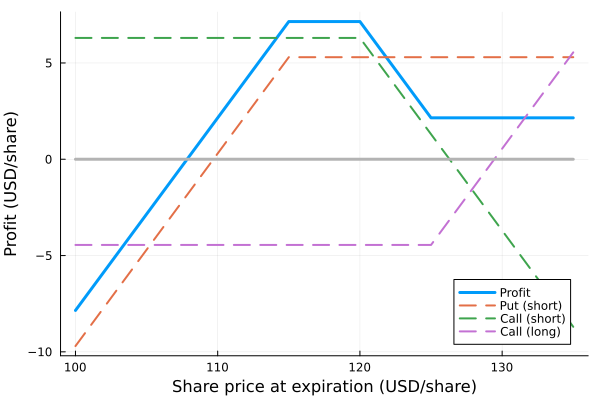

In [3]:
K₁ = 115.0
K₂ = 120.0
K₃ = 125.0

premium_1 = filter([:Strike,:Type] => (x,y) -> (x == K₁ && y == "Put"), options_dataset)[1,:Midpoint];
premium_2 = filter([:Strike,:Type] => (x,y) -> (x == K₂ && y == "Call"), options_dataset)[1,:Midpoint];
premium_3 = filter([:Strike,:Type] => (x,y) -> (x == K₃ && y == "Call"), options_dataset)[1,:Midpoint];


put_contract_model_short = build(MyAmericanPutContractModel, (
        K = K₁, premium = premium_1, sense = -1, copy = 1
));

call_contract_model_short = build(MyAmericanCallContractModel, (
        K = K₂, premium = premium_2, sense = -1, copy = 1
));

call_contract_model_long = build(MyAmericanCallContractModel, (
        K = K₃, premium = premium_3, sense = 1, copy = 1
));

S = range(100,stop = 135, step=0.1) |> collect;
BEL = zeros(length(S))
profit_array = profit([put_contract_model_short, call_contract_model_short, call_contract_model_long], S);

plot(profit_array[:,1], profit_array[:,end], lw=3, label="Profit")
plot!(profit_array[:,1], profit_array[:,2], lw=2, label="Put (short)", ls=:dash)
plot!(profit_array[:,1], profit_array[:,3], lw=2, label="Call (short)", ls=:dash)
plot!(profit_array[:,1], profit_array[:,4], lw=2, label="Call (long)", ls=:dash)

plot!(S,BEL,lw=3, c=:gray70, label="")

xlabel!("Share price at expiration (USD/share)", fontsize=18)
ylabel!("Profit (USD/share)", fontsize=18)